In [65]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import pathlib
import random
import IPython.display as display
import matplotlib.pyplot as plt
from tensorflow.python.client import device_lib

In [66]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('gpu')))
print(device_lib.list_local_devices())

Num GPUs Available:  0
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 7924902287042072049
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 14097314289050505244
physical_device_desc: "device: XLA_CPU device"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 16268260066524171496
physical_device_desc: "device: XLA_GPU device"
]


In [67]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
ALPHABET = 'а б в г д е ё ж з и й к л м н о п р с т у ф х ц ч ш щ ъ ы ь э ю я'.split()
BATCH_SIZE = 100

In [68]:
data_root_orig = '/home/dmitry/PycharmProjects/Recognition_RusHandRilNet/Dataset'
data_root = pathlib.Path(data_root_orig)
print(data_root)

/home/dmitry/PycharmProjects/Recognition-RusHandRilNet/Dataset


In [69]:
for item in data_root.iterdir():
  print(item)

/home/dmitry/PycharmProjects/Recognition-RusHandRilNet/Dataset/ш
/home/dmitry/PycharmProjects/Recognition-RusHandRilNet/Dataset/е
/home/dmitry/PycharmProjects/Recognition-RusHandRilNet/Dataset/ё
/home/dmitry/PycharmProjects/Recognition-RusHandRilNet/Dataset/щ
/home/dmitry/PycharmProjects/Recognition-RusHandRilNet/Dataset/й
/home/dmitry/PycharmProjects/Recognition-RusHandRilNet/Dataset/з
/home/dmitry/PycharmProjects/Recognition-RusHandRilNet/Dataset/ч
/home/dmitry/PycharmProjects/Recognition-RusHandRilNet/Dataset/у
/home/dmitry/PycharmProjects/Recognition-RusHandRilNet/Dataset/г
/home/dmitry/PycharmProjects/Recognition-RusHandRilNet/Dataset/с
/home/dmitry/PycharmProjects/Recognition-RusHandRilNet/Dataset/ф
/home/dmitry/PycharmProjects/Recognition-RusHandRilNet/Dataset/х
/home/dmitry/PycharmProjects/Recognition-RusHandRilNet/Dataset/ц
/home/dmitry/PycharmProjects/Recognition-RusHandRilNet/Dataset/р
/home/dmitry/PycharmProjects/Recognition-RusHandRilNet/Dataset/к
/home/dmitry/PycharmProje

In [70]:
all_image_paths = list(data_root.glob('*/*'))
all_image_paths = [str(path) for path in all_image_paths]
random.shuffle(all_image_paths)

image_count = len(all_image_paths)
image_count

14190

In [71]:
all_image_paths[:10]

['/home/dmitry/PycharmProjects/Recognition-RusHandRilNet/Dataset/к/12_137.png',
 '/home/dmitry/PycharmProjects/Recognition-RusHandRilNet/Dataset/а/01_98.png',
 '/home/dmitry/PycharmProjects/Recognition-RusHandRilNet/Dataset/в/03_241.png',
 '/home/dmitry/PycharmProjects/Recognition-RusHandRilNet/Dataset/н/15_57.png',
 '/home/dmitry/PycharmProjects/Recognition-RusHandRilNet/Dataset/ж/08_346.png',
 '/home/dmitry/PycharmProjects/Recognition-RusHandRilNet/Dataset/щ/27_281.png',
 '/home/dmitry/PycharmProjects/Recognition-RusHandRilNet/Dataset/с/19_284.png',
 '/home/dmitry/PycharmProjects/Recognition-RusHandRilNet/Dataset/ф/22_247.png',
 '/home/dmitry/PycharmProjects/Recognition-RusHandRilNet/Dataset/х/23_327.png',
 '/home/dmitry/PycharmProjects/Recognition-RusHandRilNet/Dataset/ъ/28_218.png']

In [72]:
def caption_image(image_path):
    image_rel = pathlib.Path(image_path).relative_to(data_root)
    return ' - '.join(str(image_rel).split(' - ')[:-1])


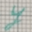

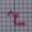

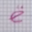

In [73]:
for n in range(3):
    image_path = random.choice(all_image_paths)
    display.display(display.Image(image_path))
    print(caption_image(image_path))
    print()

In [74]:
label_names = sorted(item.name for item in data_root.glob('*/') if item.is_dir())
label_names


['а',
 'б',
 'в',
 'г',
 'д',
 'е',
 'ж',
 'з',
 'и',
 'й',
 'к',
 'л',
 'м',
 'н',
 'о',
 'п',
 'р',
 'с',
 'т',
 'у',
 'ф',
 'х',
 'ц',
 'ч',
 'ш',
 'щ',
 'ъ',
 'ы',
 'ь',
 'э',
 'ю',
 'я',
 'ё']

In [75]:
label_to_index = dict((name, index) for index, name in enumerate(label_names))
label_to_index

{'а': 0,
 'б': 1,
 'в': 2,
 'г': 3,
 'д': 4,
 'е': 5,
 'ж': 6,
 'з': 7,
 'и': 8,
 'й': 9,
 'к': 10,
 'л': 11,
 'м': 12,
 'н': 13,
 'о': 14,
 'п': 15,
 'р': 16,
 'с': 17,
 'т': 18,
 'у': 19,
 'ф': 20,
 'х': 21,
 'ц': 22,
 'ч': 23,
 'ш': 24,
 'щ': 25,
 'ъ': 26,
 'ы': 27,
 'ь': 28,
 'э': 29,
 'ю': 30,
 'я': 31,
 'ё': 32}

In [76]:
all_image_labels = [label_to_index[pathlib.Path(path).parent.name]
                    for path in all_image_paths]

print("First 10 labels indices: ", all_image_labels[:10])

First 10 labels indices:  [10, 0, 2, 13, 6, 25, 17, 20, 21, 26]


In [77]:
img_path = all_image_paths[0]
img_path

'/home/dmitry/PycharmProjects/Recognition-RusHandRilNet/Dataset/к/12_137.png'

In [78]:
img_raw = tf.io.read_file(img_path)
print(repr(img_raw)[:100]+"...")

<tf.Tensor: shape=(), dtype=string, numpy=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x00 \x00\x00...


In [79]:
img_tensor = tf.image.decode_image(img_raw)

print(img_tensor.shape)
print(img_tensor.dtype)

(32, 32, 4)
<dtype: 'uint8'>


In [80]:
img_final = tf.image.resize(img_tensor, [32, 32])
img_final = img_final/255.0
print(img_final.shape)
print(img_final.numpy().min())
print(img_final.numpy().max())

(32, 32, 4)
0.25882354
1.0


In [81]:
def preprocess_image(image):
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, [32, 32])
    image /= 255.0  # normalize to [0,1] range

    return image

In [82]:
def load_and_preprocess_image(path):
    image = tf.io.read_file(path)
    return preprocess_image(image)

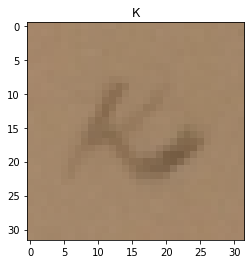

In [83]:
image_path = all_image_paths[0]
label = all_image_labels[0]

plt.imshow(load_and_preprocess_image(img_path))
plt.grid(False)
plt.xlabel(caption_image(img_path))
plt.title(label_names[label].title())
print()

In [84]:
path_ds = tf.data.Dataset.from_tensor_slices(all_image_paths)
print(path_ds)

<TensorSliceDataset shapes: (), types: tf.string>


In [85]:
image_ds = path_ds.map(load_and_preprocess_image, num_parallel_calls=AUTOTUNE)

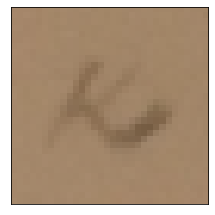

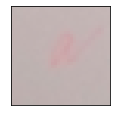

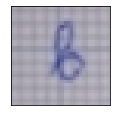

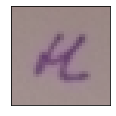

In [86]:
plt.figure(figsize=(8,8))
for n, image in enumerate(image_ds.take(4)):
    plt.subplot(2,2,n+1)
    plt.imshow(image)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(caption_image(all_image_paths[n]))
    plt.show()

In [87]:
label_ds = tf.data.Dataset.from_tensor_slices(tf.cast(all_image_labels, tf.int64))
for label in label_ds.take(10):
    print(label_names[label.numpy()])

к
а
в
н
ж
щ
с
ф
х
ъ


In [88]:
image_label_ds = tf.data.Dataset.zip((image_ds, label_ds))

In [89]:
print(image_label_ds)

<ZipDataset shapes: ((32, 32, 3), ()), types: (tf.float32, tf.int64)>


In [90]:
# Установка размера буфера перемешивания, равного набору данных, гарантирует
# полное перемешивание данных.
ds = image_label_ds.shuffle(buffer_size=image_count)
ds = ds.repeat()
ds = ds.batch(BATCH_SIZE)
# `prefetch` позволяет датасету извлекать пакеты в фоновом режиме, во время обучения модели.
ds = ds.prefetch(buffer_size=AUTOTUNE)
ds

<PrefetchDataset shapes: ((None, 32, 32, 3), (None,)), types: (tf.float32, tf.int64)>

In [91]:
ds = image_label_ds.apply(
  tf.data.experimental.shuffle_and_repeat(buffer_size=image_count))
ds = ds.batch(BATCH_SIZE)
ds = ds.prefetch(buffer_size=AUTOTUNE)
ds

<PrefetchDataset shapes: ((None, 32, 32, 3), (None,)), types: (tf.float32, tf.int64)>

In [92]:
def change_range(image,label):
    return 2*image-1, label

keras_ds = ds.map(change_range)

In [93]:
# Датасету может понадобиться несколько секунд для старта пока заполняется буфер перемешивания.
image_batch, label_batch = next(iter(keras_ds))

In [94]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(33))

In [95]:
logit_batch = model(image_batch).numpy()

print("min logit:", logit_batch.min())
print("max logit:", logit_batch.max())
print()

print("Shape:", logit_batch.shape)

min logit: -0.19159763
max logit: 0.18546876

Shape: (100, 33)


In [96]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=["accuracy"])

In [97]:
len(model.trainable_variables)

10

In [98]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                6

In [99]:
steps_per_epoch=tf.math.ceil(len(all_image_paths)/BATCH_SIZE).numpy()
steps_per_epoch

142.0

Epoch 1/100
444/444 [==============================] - 13s 30ms/step - loss: 5.3946 - accuracy: 0.0319

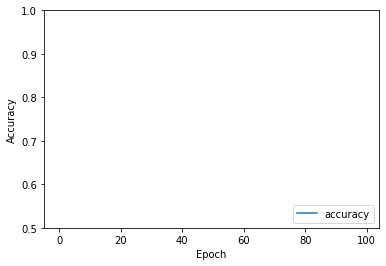

In [100]:
with tf.device('/GPU:0'):
    history = model.fit(ds, epochs=100, steps_per_epoch=444)

    plt.plot(history.history['accuracy'], label='accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.ylim([0.5, 1])
    plt.legend(loc='lower right')

    #test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)